## What is prompt engineering?
- Crafting prompts or instructions given to LLMs to get desired responses

## Every message has one of three roles
1. System message: guides model behavior
2. User message: prompt from the user
3. Assistant message: response to user prompt

## Control parameters
`temperature`: controls answer's randomness<br>
`max_tokens`: controls response length

### Communicating with OpenAI API

In [ ]:
prompt = "What is prompt engineering?"
client = OpenAI(api_key="api_key")
response = client.chat.completions.create( 
    model = "gpt-3.5-turbo", 
    messages = [{"role": "user","content": prompt}], 
    temperature = 0
)

print(response.choices[0].message.content)

### Creating `get_response()` function

In [ ]:
def get_response(prompt):  
    response = client.chat.completions.create(   
        model = "gpt-3.5-turbo",   
        messages = [{"role": "user","content": prompt}], 
        temperature = 0 
    )

    return response.choices[0].message.content

In [ ]:
# Usage

response = get_response("What is prompt engineering?")
print(response)

In [ ]:
# Prompt Improvement

prompt = "What is prompt engineering? Explain it in terms that can be understood by a 5-year-old"
response = get_response(prompt)
print(response)

In [ ]:
# Practice 1

# Create the OpenAI client: you can leave "<OPENAI_API_TOKEN>" as is
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Define the conversation messages
conversation_messages = [
    {"role": "assistant", "content": "You are a helpful event management assistant."},
    {"role": "user", "content": "What are some good conversation starters at networking events?"},
    {"role": "system", "content": ""}
]

response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=conversation_messages
)
print(response.choices[0].message.content)

In [ ]:
# Practice 2

def get_response(prompt):
  # Create a request to the chat completions endpoint
  response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": prompt}], 
    temperature = 0)
  return response.choices[0].message.content

# Test the function with your prompt
response = get_response("Write a poem about ChatGPT")
print(response)

In [ ]:
# Practice 3

client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Craft a prompt that follows the instructions
prompt = "Generate a poem about ChatGPT while ensuring that it is written in basic English that a child can understand."

# Get the response
response = get_response(prompt)

print(response)

### Key principles in Prompt Engineering
- Appropriate action verbs
- Detailed and precise instructions
- Well-structured delimited prompts

### Use action verbs and avoid ambiguous verbs
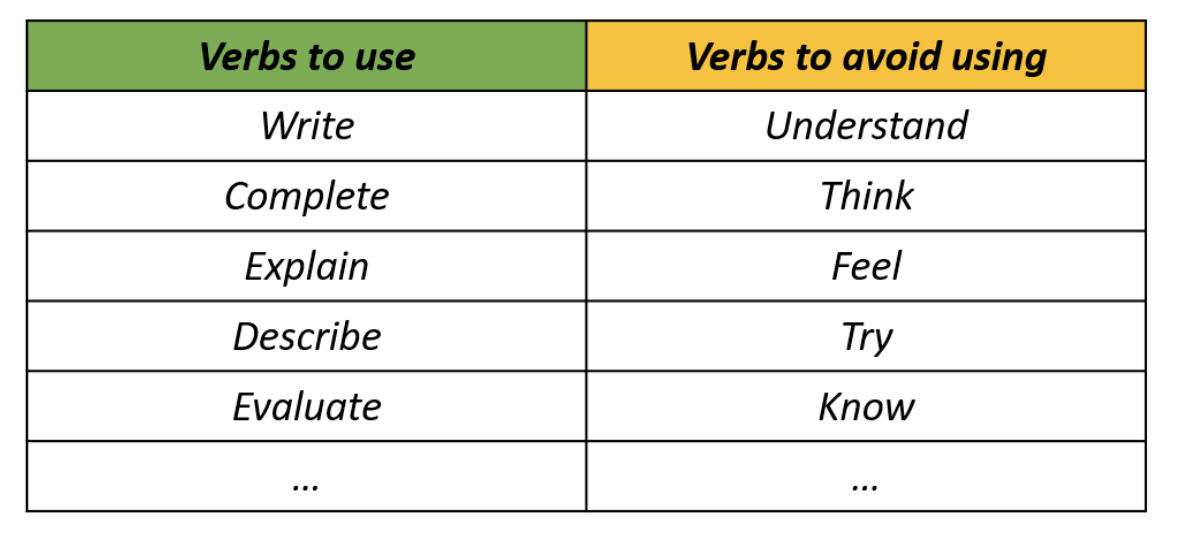

### Effective prompt with verbs

In [ ]:
prompt = "Think about the issue of deforestation."
response = get_response(prompt)
print(response)

In [ ]:
# Effective prompt
prompt = "Propose strategies to reduce deforestation."
response = get_response(prompt)
print(response)

### Formulating detailed instructions
- Provide specific, descriptive, and detailed instructions regarding:
  - Context
  - Output length
  - Format and style
  - Audience

### Effective prompt with instructions

In [ ]:
prompt = '''Write a descriptive paragraph about the behavior and characteristics of Golden Retrievers,
highlighting their friendly nature, intelligence, and suitability as family pets.'''

print(get_response(prompt))

### Limiting output length
| **max_tokens** | **Prompt** |
|----------------|------------|
| - Limit on number of tokens <br> - Output cannot bypass it <br> - Might lead to incomplete or cut responses | - Limit on words, sentences, or paragraphs <br> - Output may bypass it <br> - Complete responses |

### Prompt components
- Instructions and input data to operate on
- Example: text summarization
    - Instruction: summarize the given text
    - Input data: text to summarize

### Crafting a well-structured prompt with delimiters
- Start prompt with instructions
- Use delimiters (parentheses, brackets, backticks, etc.) to specify input parts
- Mention which delimiters are used

In [ ]:
prompt = """Summarize the text delimited by triple backticks into bullet points.     
```TEXT GOES HERE```"""

response = get_response(prompt)

### Using formatted strings (f-strings)
- Include defined string into another string

In [ ]:
text = "This is a sample text to summarize"
prompt = f"""Summarize the text delimited by triple backticks into bullet points.    
```{text}```"""

print(prompt)

In [ ]:
# Practice 4

client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Create a prompt that completes the story
prompt = f"""Complete the story delimited by triple backticks ```{story}```"""

# Get the generated response 
response = get_response(prompt)

print("\n Original story: \n", story)
print("\n Generated story: \n", response)

In [ ]:
# Practice 5

client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Create a request to complete the story
prompt = f"""Complete the given story with only two paragraphs in the style of Shakespeare, delimited by triple backticks ```{story}```"""

# Get the generated response
response = get_response(prompt)

print("\n Original story: \n", story)
print("\n Generated story: \n", response)

## Structured outputs and conditional prompts

### Structured outputs
- LLMs generate structured outputs only when given explicit instructions
- Output structures:
   - Table
   - List
   - Structured paragraph
   - Custom format

### Tables
- Clearly mention expected columns

In [ ]:
prompt = "Generate a table containing 5 movies I should watch if I am an action lover, with columns for Title and Rating."
print(get_response(prompt))

### Lists
- Helpful for enumerations
- Requirements for numbering should be mentioned in prompt

In [ ]:
prompt = "Generate a list containing the names of the top 5 cities to visit."
print(get_response(prompt))

prompt = "Generate an unordered list containing the names of the top 5 cities to visit."
print(get_response(prompt))

### Structured paragraphs
- Mention structure requirements in prompt

In [ ]:
prompt = '''Provide a structured paragraph with clear headings and subheadings about the benefits of regular
exercise on overall health and well-being.'''

print(get_response(prompt))

### Custom output format

In [ ]:
text = "Once upon a time in a quaint little village, there lived a curious young boy named David. David was [...]"

instructions = "You will be provided with a text delimited by triple backticks. Generate a suitable title for it. "

output_format = """Use the following format for the output:        
    - Text: <text we want to title>    
    - Title: <the generated title>"""

prompt = instructions + output_format + f"```{text}```"
print(get_response(prompt))

### Conditional prompts

In [ ]:
text = '''Le printemps est ma saison préférée. Quand les premières fleurs commencent àéclore, et que les arbres 
se parent de feuilles vertes et tendres, je me sens revivre [...] '''

prompt = f"""You will be provided with a text delimited by triple backticks. If the text is written in English, 
suggest a suitable title for it. Otherwise, write 'I only understand English'.  ```{text}```"""

print(get_response(prompt))

### Conditional prompts
- Can incorporate multiple conditions

In [ ]:
text = "In the heart of the forest, sunlight filters through the lush green canopy, creating a tranquil atmosphere [...] "

prompt = f"""You will be provided with a text delimited by triple backticks.         
If the text is written in English, check if it contains the keyword 'technology'.  ```{text}```"""

print(get_response(prompt))

In [ ]:
prompt = f"""You will be provided with a text delimited by triple backticks.        
            If the text is written in English, check if it contains the keyword 'technology'.         
            If it does, suggest a suitable title for it, otherwise, write 'Keyword not found'.      
            If the text is not written in English, reply with 'I only understand English'. ```{text}```"""

print(get_response(prompt))

In [ ]:
# Practice 6

client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Create a prompt that generates the table
prompt = "Generate a table of 10 books, with columns for Title, Author, and Year, that you should read that you are a science fiction lover."

# Get the response
response = get_response(prompt)
print(response)

In [ ]:
# Practice 7

client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Create the instructions
instructions = f"""Ask the model to determine the language and generate a suitable title for the pre-loaded 
text excerpt that will be provided using triple backticks as delimeters '''{text}'''"""

# Create the output format
output_format = """Use the following format for the output:
    - 'Text: <the text itself>'
    - 'Language: <the determined language>'
    - 'Title: <the generated title>'"""

# Create the final prompt
prompt = instructions + output_format + f"'''{text}'''"
response = get_response(prompt)
print(response)

In [ ]:
# Practice 8

client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Create the instructions
instructions = """Infer the language and the number of sentences of the given delimited {text}; then if the text contains more than one sentence, generate a suitable title for it, otherwise, write 'N/A' for the title."""

# Create the output format
output_format = """Use the following format for the output:
    - 'Text: <the text provided>'
    - 'Language: <the type of language>'
    - 'Title: <the generated title> """

prompt = instructions + output_format + f"```{text}```"
response = get_response(prompt)
print(response)